In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from adaptive_al_v2.utils.data_loader import load_imdb
import warnings

sns.set_theme(style="whitegrid")
warnings.filterwarnings("ignore")

## Load Dataset

In [3]:
_,(df_train, df_val, df_test) = load_imdb()

df = pd.concat([df_train, df_val])
print(df.shape)
df.head()

(40000, 2)


,text,label
0,He really lost the plot with this one! None of...,0
1,I loved this movie when I was a teenager. LOVE...,0
2,This film almost gave me a nervous breakdown. ...,0
3,This movie was supposedly based on a non-ficti...,0
4,What a fascinating film. Even if it wasn't bas...,1


##  Label Distribution

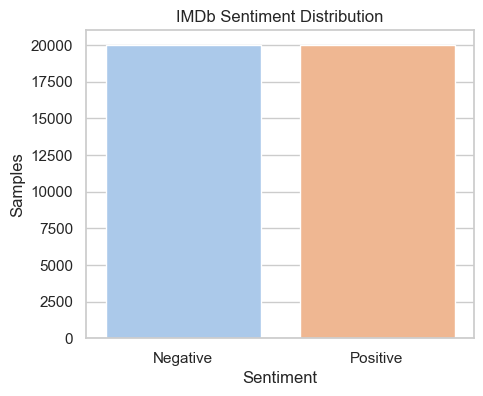

In [4]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="label", palette="pastel")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.title("IMDb Sentiment Distribution")
plt.ylabel("Samples")
plt.xlabel("Sentiment")
plt.show()


##  Text Length Analysis

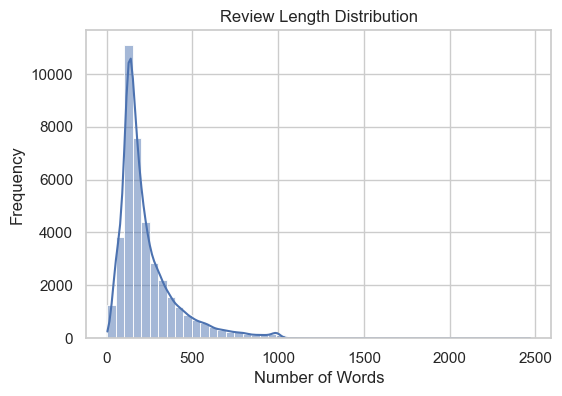

In [5]:
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6, 4))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


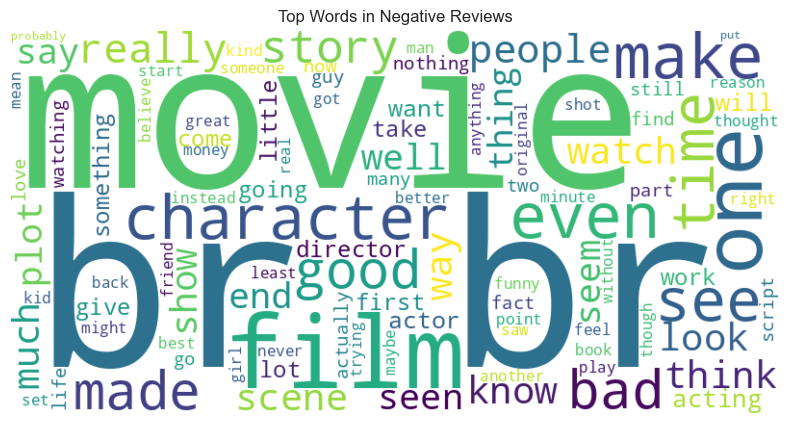

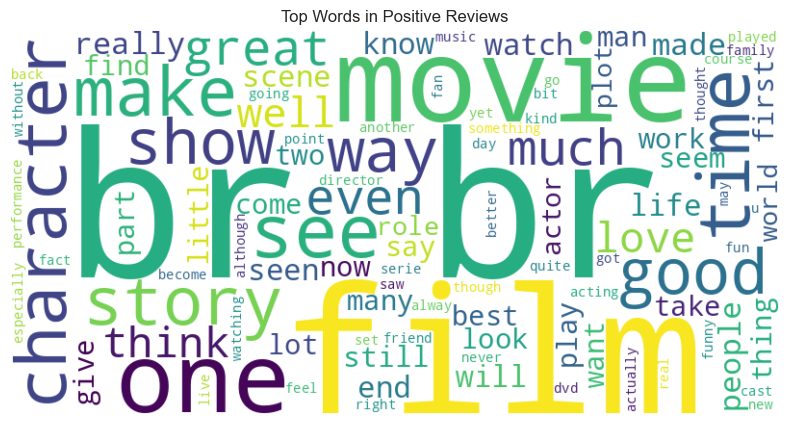

In [6]:
stopwords = set(STOPWORDS)

for label_id, label_name in {0: "Negative", 1: "Positive"}.items():
    subset = df[df["label"] == label_id]
    text_blob = " ".join(subset["text"]).lower()

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stopwords, max_words=100).generate(text_blob)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Words in {label_name} Reviews")
    plt.show()
